### Ансамблирование

#### Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [2]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df[['ST_Slope']].value_counts()

ST_Slope
Flat        460
Up          395
Down         63
dtype: int64

Преобразуем категориальные признаки Sex и ExerciseAngina через Label Encoding, а признаки ChestPainType, RestingECG и ST_Slope через One-Hot Encoding.

In [4]:
trasformed_df = df.copy()

In [5]:
trasformed_df['Sex'] = LabelEncoder().fit_transform(trasformed_df[['Sex']].values)
trasformed_df['ExerciseAngina'] = LabelEncoder().fit_transform(trasformed_df[['ExerciseAngina']].values)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
trasformed_df = pd.get_dummies(trasformed_df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

In [7]:
trasformed_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


По гистограммам ниже можно посмотреть на распределение признаков. Также можно заметить что для признака ChestPainType, очень мало значений для TA и много для ASY, думаю это может сказаться на моделе. Такая же ситуация с признаком ST_Slope для значения Down.

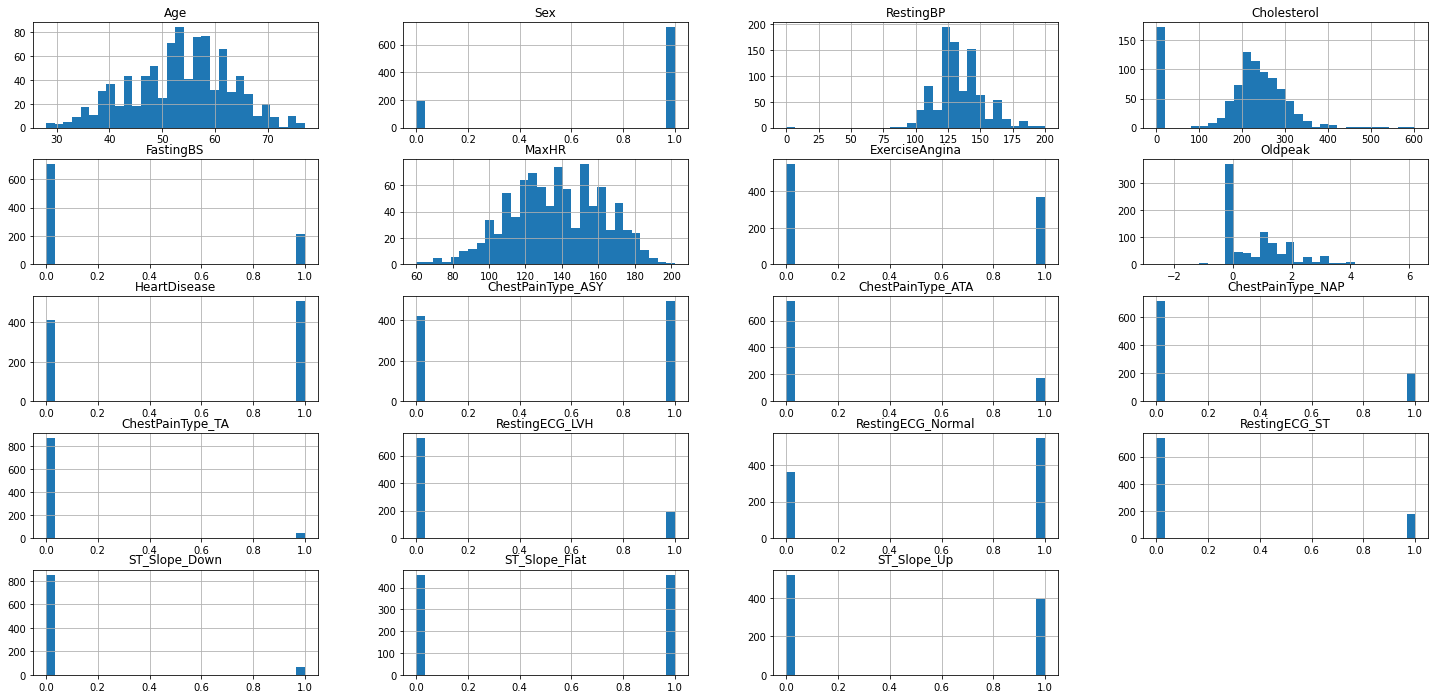

In [8]:
_ = trasformed_df.hist(figsize=(25, 12), bins=30)

На диаграмме видим зависимости между переменными. Можно заметить значение -0.87% между ST_Slope_Flat и ST_Slope_Up, это связано как раз с тем что значений у признака ST_Slope очень мало и получается по статистике, что если ST_Slope_Flat = 0, то ST_Slope_Up = 1.

<AxesSubplot:>

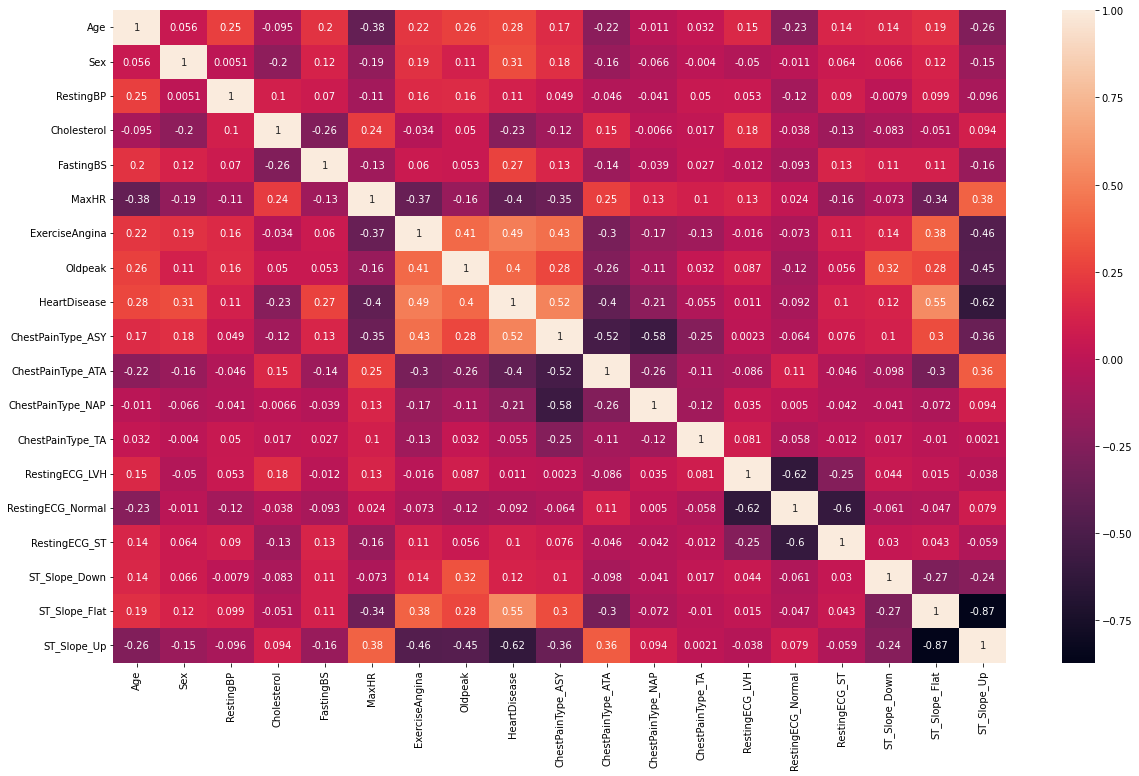

In [9]:
plt.subplots(figsize=(20,12))  
sns.heatmap(trasformed_df.corr(), annot=True, fmt='.2g')

Построим график зависимости заболевания от гендера. Можно заметить что мужчины зболевают чаще женщин.

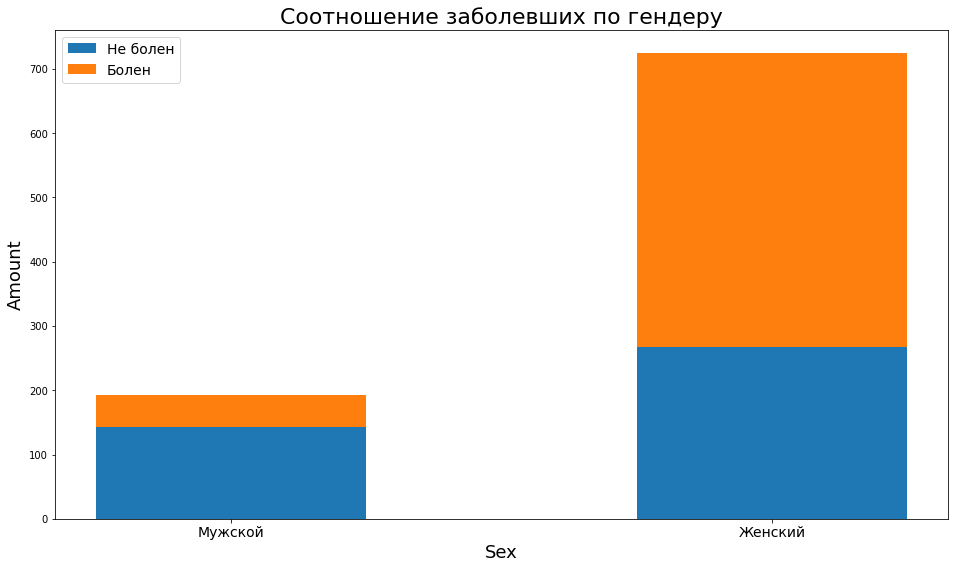

In [10]:
x_var = 'Sex'
groupby_var = 'HeartDisease'
df_agg = trasformed_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
bins = 3

plt.figure(figsize=(16,9))
plt.hist(vals, bins, stacked=True)

plt.legend(["Болен" if group else "Не болен" for group in np.unique(trasformed_df[groupby_var]).tolist()], fontsize=14)
plt.title("Соотношение заболевших по гендеру", fontsize=22)
plt.xlabel("Sex", fontsize=18)
plt.ylabel("Amount", fontsize=18)
plt.xticks(ticks=[0 + 1/bins/2, 1 - 1/bins/2], labels=["Мужской", "Женский"], fontsize=14)

plt.show()

Построим график зависимости заболевания от ST_Slope. Можно сказать что с большой вероятностью если значение в этом признаке будет равным Up то человек вероятнее болен, а если значение Flat, то скорее всего он не болен.

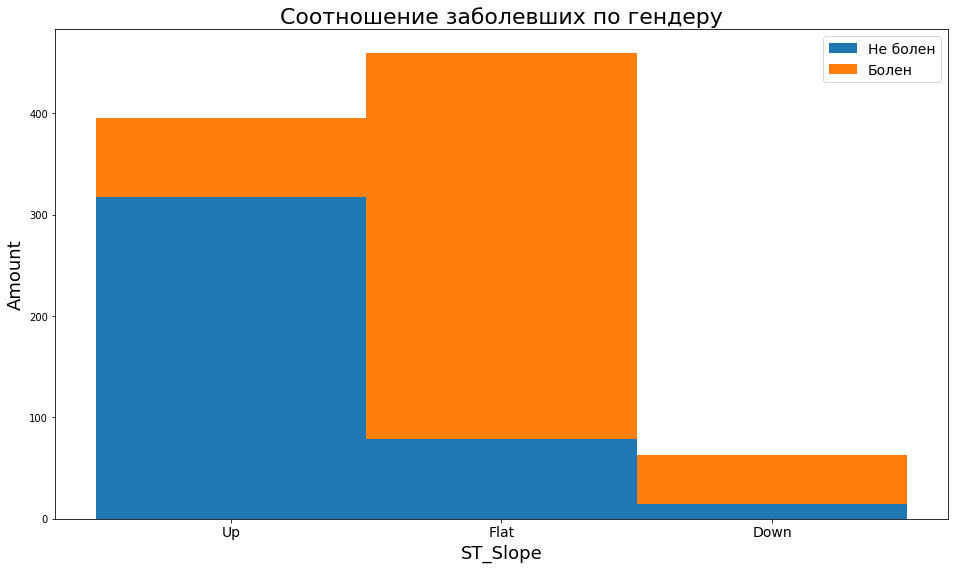

In [11]:
x_var = 'ST_Slope'
groupby_var = 'HeartDisease'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
bins = 3

plt.figure(figsize=(16,9))
plt.hist(vals, bins, stacked=True)

plt.legend(["Болен" if group else "Не болен" for group in np.unique(df[groupby_var]).tolist()], fontsize=14)
plt.title("Соотношение заболевших по гендеру", fontsize=22)
plt.xlabel("ST_Slope", fontsize=18)
plt.ylabel("Amount", fontsize=18)
plt.xticks(ticks=[0 + 1/bins, 1, 2 - 1/bins], labels=["Up", "Flat", "Down"], fontsize=14)

plt.show()

Поставим целевую переменную в конец датафрейма

In [12]:
print(list(trasformed_df.columns))

['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [13]:
trasformed_df = trasformed_df[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'HeartDisease']]
trasformed_df.head(3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0


#### Обучение DecisionTreeClassifier и RandomForestClassifier

In [14]:
statistic = [['model', 'Score_Test', 'Score_Train']]

def train(df, model, model_name):
  X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[:-1]],
                                                    df[df.columns[-1]], test_size=0.2, random_state=2)
  model.fit(X_train, Y_train)    

  Score_Test = model.score(X_test, Y_test)
  Score_Train = model.score(X_train, Y_train)

  print("Test Score: ", Score_Test)
  print("Train Score: ", Score_Train)
  print("---------------------------------------------------------")
  print(classification_report(Y_test, model.predict(X_test)))
  statistic.append([model_name, Score_Test, Score_Train])

Обучим DecisionTreeClassifier и RandomForestClassifier. Видно что RandomForestClassifier дал лучшие результаты на тестовой выборке на 12%.

In [15]:
decision_tree_model = DecisionTreeClassifier(random_state=2)
train(trasformed_df, decision_tree_model, 'DecisionTreeClassifier')

Test Score:  0.7282608695652174
Train Score:  1.0
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.74      0.74      0.74        95

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



In [16]:
random_forest_model = RandomForestClassifier(random_state=2)
train(trasformed_df, random_forest_model, 'RandomForestClassifier')

Test Score:  0.842391304347826
Train Score:  1.0
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        89
           1       0.82      0.88      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



По графику важности признаков DecisionTreeClassifier видно что признаки St_Slope_Flat/Down не используются при предсказаниях, наверное из-за того что у них большой процент вероятности того что человек болен, и модель не рассматривает варианты для этих признаков, когда человек не болен.

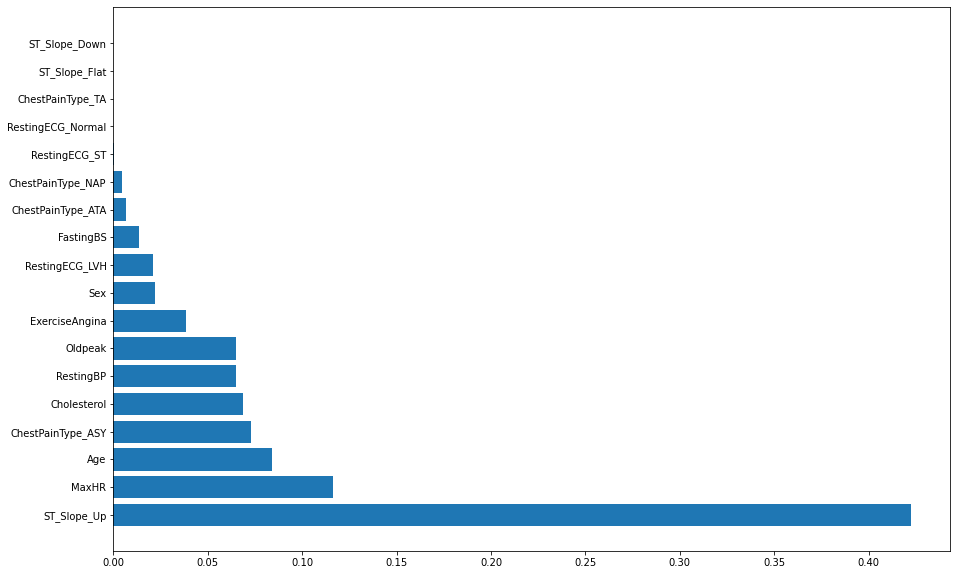

In [17]:
sorted_indices = np.argsort(decision_tree_model.feature_importances_)[::-1]
plt.figure(figsize=(15, 10))
plt.barh(np.arange(len(sorted_indices)), [decision_tree_model.feature_importances_[i] for i in sorted_indices])
plt.yticks(np.arange(len(trasformed_df.columns[sorted_indices])), trasformed_df.columns[sorted_indices])
plt.show()

По графику важности признаков RandomForestClassifier видно, что признаки, которые не имели значения в предыдущем варианте здесь повысили свою значимость и всё кажется более сбалансированным.

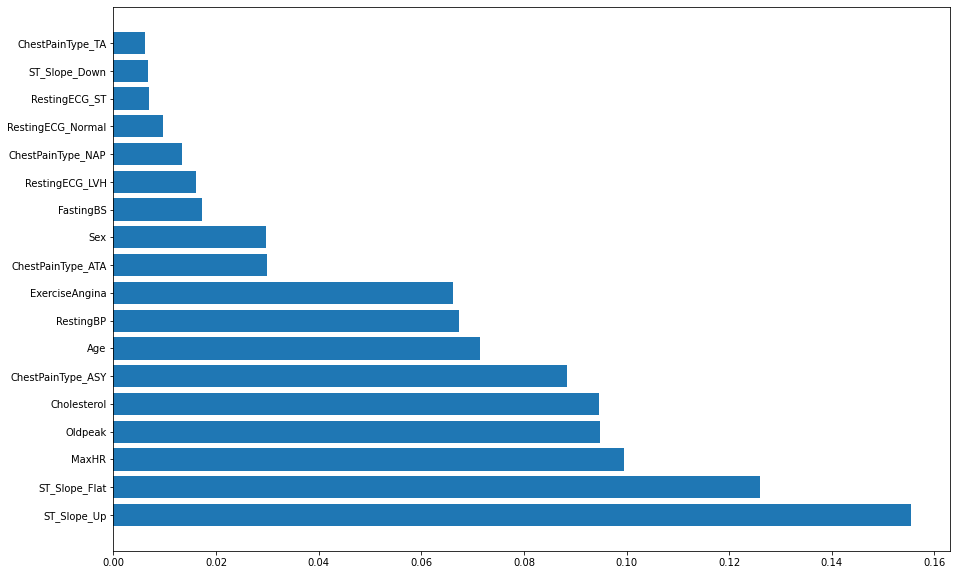

In [18]:
sorted_indices = np.argsort(random_forest_model.feature_importances_)[::-1]
plt.figure(figsize=(15, 10))
plt.barh(np.arange(len(sorted_indices)), [random_forest_model.feature_importances_[i] for i in sorted_indices])
plt.yticks(np.arange(len(trasformed_df.columns[sorted_indices])), trasformed_df.columns[sorted_indices])
plt.show()

Обучим Bagging. Bagging без параметров дает результаты хуже чем RandomForestClassifier, но лучше чем одно дерево решений. Bagging с параметрами дает прирост точности по сравнению такой же модели без параметров, но всёравно уступает на 2% RandomForestClassifier.

In [19]:
bagging_without_params = BaggingClassifier(DecisionTreeClassifier(), random_state=2)
train(trasformed_df, bagging_without_params, 'BaggingRegressor without params')

Test Score:  0.8097826086956522
Train Score:  0.9877384196185286
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        89
           1       0.80      0.84      0.82        95

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



In [20]:
bagging_with_params = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.7, random_state=2)
train(trasformed_df, bagging_with_params, 'BaggingClassifier max samples/features by 0.5/0.7')


Test Score:  0.8206521739130435
Train Score:  0.946866485013624
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        89
           1       0.82      0.84      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



Обучим Stacking. Наша модель смогла превзойти RandomForestClassifier на 2%.

In [21]:
stacking = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=2)),
        ('RandomForestClassifier', RandomForestClassifier(random_state=2)),
        ('LinearSVC', LinearSVC(random_state=2))
    ], SGDClassifier(random_state=2))
train(trasformed_df, stacking, 'StackingClassifier')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Test Score:  0.8641304347826086
Train Score:  0.997275204359673
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        89
           1       0.86      0.88      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Давайте посмотрим какие метрики у наших подмоделей. Видим что самой успешной моделью была RandomForestClassifier, но там где эта модель могла выдать ошибку, ей помогали справиться две другие модели, тз-за чего наша общая метрика увеличилась.

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(trasformed_df[trasformed_df.columns[:-1]],
                                                    trasformed_df[trasformed_df.columns[-1]], test_size=0.2, random_state=2)

print(f'Score on train data {stacking.score(X_train, Y_train)}')
print(f'Score on test data {stacking.score(X_test, Y_test)}')

for i in stacking.named_estimators:
    print(f'Score on train data with model {i} {stacking.named_estimators_[i].score(X_train, Y_train)}')
    print(f'Score on test data with model {i} {stacking.named_estimators_[i].score(X_test, Y_test)}')


Score on train data 0.997275204359673
Score on test data 0.8641304347826086
Score on train data with model DecisionTreeClassifier 1.0
Score on test data with model DecisionTreeClassifier 0.7282608695652174
Score on train data with model RandomForestClassifier 1.0
Score on test data with model RandomForestClassifier 0.842391304347826
Score on train data with model LinearSVC 0.8160762942779292
Score on test data with model LinearSVC 0.8043478260869565


Обучим Boosting. Boosting показал метрику лучше чем у RandomForestClassifier, но хуже на 1% чем у Stacking.

In [23]:
lgbm = LGBMClassifier(random_state=2)
train(trasformed_df, lgbm, 'LGBMClassifier')

Test Score:  0.8532608695652174
Train Score:  1.0
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



Можно заметить что в бустинге в отличие от моделей DecisionTreeClassifier и RandomForestClassifier другие признаки являются ключевыми для предсказаний.

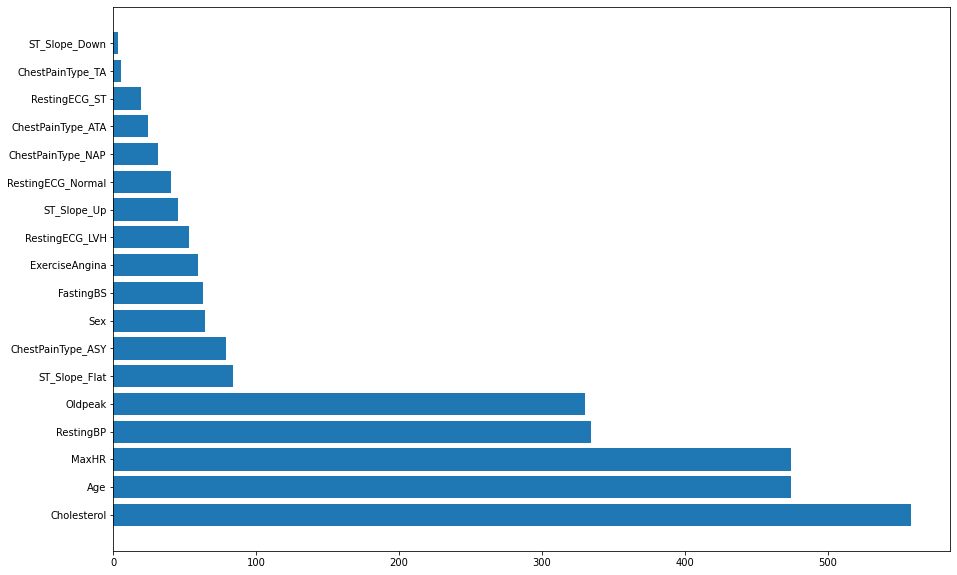

In [24]:
sorted_indices = np.argsort(lgbm.feature_importances_)[::-1]
plt.figure(figsize=(15, 10))
plt.barh(np.arange(len(sorted_indices)), [lgbm.feature_importances_[i] for i in sorted_indices])
plt.yticks(np.arange(len(trasformed_df.columns[sorted_indices])), trasformed_df.columns[sorted_indices])
plt.show()

Посмотрим на наши метрики

In [25]:
stat = pd.DataFrame(statistic[1:], columns = statistic[0])
stat

,model,Score_Test,Score_Train
0,DecisionTreeClassifier,0.728261,1.000000
1,RandomForestClassifier,0.842391,1.000000
2,BaggingRegressor without params,0.809783,0.987738
3,BaggingClassifier max samples/features by 0.5/0.7,0.820652,0.946866
4,StackingClassifier,0.864130,0.997275
5,LGBMClassifier,0.853261,1.000000


### Выводы

Сравнивая метрики можно сделать вывод что лучше всех себя показал на наших данных StackingClassifier. Близкую точность имеют RandomForest и LGBM. Худшую точность показала модель одиночого дерева без параметров. Также по точности на обучающей выборке видно что наши модели переобучились.

Лучшая модель для меня это StackingClassifier так как она может в себе собирать разные модели + если задать доп параметры модель показала бы себя еще лучше, за счет того что подмодели могут покрывать слабые места друг друга.